## Лабораторна 2
#### Виконав Процик Олексій, ПМ4

In [16]:
import pandas as pd
from sklearn.metrics import r2_score
import scipy
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('TSLA.csv')

snp = pd.read_csv('^GSPC.csv')

In [17]:
import numpy as np

In [18]:
snp['x'] = (snp['High'] + snp['Low']) / 2

In [19]:
x,y = snp['x'], (data['High'] + data['Low'])/2.

In [20]:
y = y.iloc[1:].reset_index(drop=True)

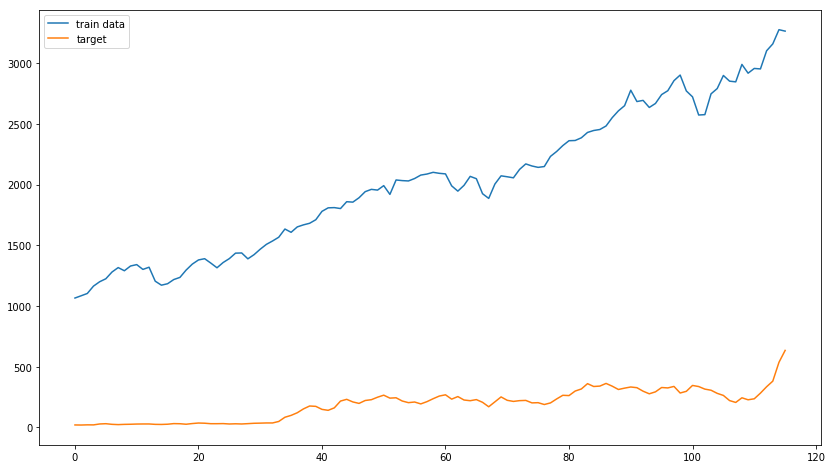

In [21]:
fig, ax = plt.subplots(figsize=(14,8))
plt.plot(x, label='train data')
plt.plot(y, label='target')
plt.legend()

In [22]:
model = []
r_sq = []
r = []
f = []
f_stat = []
alpha = []
beta = []

In [23]:
def get_pred(model, x, a, b):
    prediction = model(x, a, b)
    prediction[np.isinf(prediction)] = 1000 # avoid infinity values
    return prediction
def write_stats(prediction, y, model_name):
    r_calc = np.var(prediction)/np.var(y)
    model.append(model_name)
    r_sq.append(r2_score(y,prediction))
    r.append(r_calc)
    f_stat.append((r_sq[-1] * (len(y)-2))/(1-r_sq[-1]))
    f.append(scipy.stats.f.cdf(r_calc, len(x)-1, len(y)-1))
    alpha.append(p1[0])
    beta.append(p1[1])

Model 1 <br>
$y = \alpha * \beta ^{x} $ => $ln(y) = ln(\alpha) + ln(\beta) * x$

$\frac{d}{dx} (a*e^{bx}) = a*b^x*ln(b)$ => $a*b^x*ln(b)*\frac{x}{a*b^x}$ => $x*lnb$

Коефіцієнт еластичності: 0.0015142451588551235


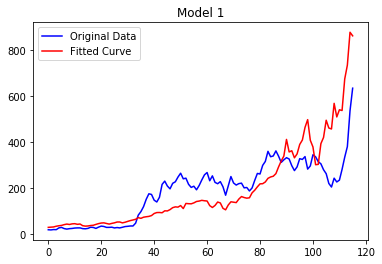

In [24]:
def first_model(x, a, b):
    return np.log(a) + np.log(b)*x

model_name = "Model 1"
p1, p2 = curve_fit(first_model, x, np.log(y))
plt.plot(y, c='blue', label="Original Data")
prediction = get_pred(first_model, x, *p1)
prediction = np.exp(prediction)

plt.plot(prediction, c='red', label="Fitted Curve")
plt.legend()
plt.title(model_name)

write_stats(prediction, y, model_name)
elastic = np.log(beta[0])*1
print(f"Коефіцієнт еластичності: {elastic}")

Model 2<br>
$y = \alpha * e ^{\beta x}$  =>  $ln(y) = ln(\alpha) + \beta * x$

$\frac{d}{dx} (a*e^{bx}) = a*b*e^{bx}$ => $a*b*e^{bx} * \frac{x}{a*e^{bx}}$ => $b*x$

Коефіцієнт еластичності: 0.0015142451575851275


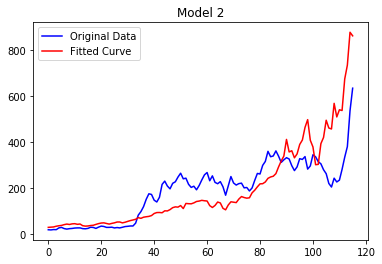

In [25]:
def second_model(x, a, b):
    return np.log(a) + b*x

model_name = "Model 2"
p1, p2 = curve_fit(second_model, x, np.log(y))
plt.plot(y, c='blue', label="Original Data")
prediction = get_pred(second_model, x, *p1)
prediction = np.exp(prediction)

plt.plot(prediction, c='red', label="Fitted Curve")
plt.legend()
plt.title("Model 2")

write_stats(prediction, y, model_name)
elastic = beta[1]*1
print(f"Коефіцієнт еластичності: {elastic}")

Model 3<br>
$y = e ^{\alpha  + \beta x}$  =>  $ln(y) = \alpha + \beta * x$

коефіцієнт еластичності = $\beta*x$

Коефіцієнт еластичності: 0.0015142451553618564


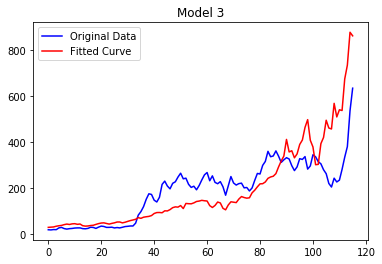

In [26]:
def third_model(x, a, b):
    return a + b*x

model_name = "Model 3"
p1, p2 = curve_fit(third_model, x, np.log(y))
plt.plot(y, c='blue', label="Original Data")
prediction = get_pred(third_model, x, *p1)
prediction = np.exp(prediction)

plt.plot(prediction, c='red', label="Fitted Curve")
plt.legend()
plt.title(model_name)

write_stats(prediction, y, model_name)
elastic = beta[2]*1
print(f"Коефіцієнт еластичності: {elastic}")

Model 4<br>
$y = 10 ^{\alpha  + \beta * x}$  ==>  $ln_{10}(y) = \alpha + \beta * x$

$\frac{d}{dx} (10^{a+bx}) = b*ln(10)*10^{a+bx}$ => $b*ln(10)*10^{a+bx}*\frac{x}{10^{a+bx}}$ => $b*ln(10)*x$

Коефіцієнт еластичності: 0.0015142451596913942


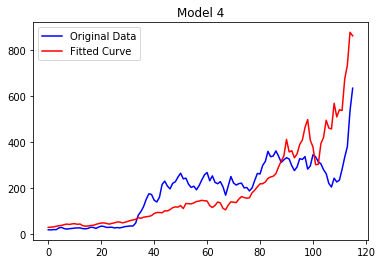

In [27]:
def fourth_model(x, a, b):
    return a + b*x

model_name = "Model 4"
p1, p2 = curve_fit(fourth_model, x, np.log10(y))
plt.plot(y, c='blue', label="Original Data")
prediction = get_pred(fourth_model, x, *p1)
prediction = 10 ** prediction

plt.plot(prediction, c='red', label="Fitted Curve")
plt.legend()
plt.title(model_name)

write_stats(prediction, y, model_name)
elastic = beta[3]*np.log(10)*1
print(f"Коефіцієнт еластичності: {elastic}")

Model 5<br>
$y = \alpha * x ^{\beta}$  =>  $ln(y) = ln(\alpha) + \beta * ln(x)$

$\frac{d}{dx} (a*x^b) = a*b*x^{b-1}$ => $a*b*x^{b-1}*\frac{x}{a*x^b}$ => $b$

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


Коефіцієнт еластичності: 3.1123615989458377


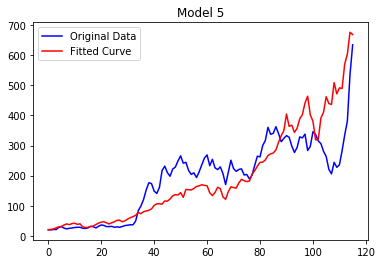

In [28]:
def fifth_model(x, a, b):
    return np.log(a) + b*np.log(x)

model_name = "Model 5"
p1, p2 = curve_fit(fifth_model, x, np.log(y))
plt.plot(y, c='blue', label="Original Data")
prediction = get_pred(fifth_model, x, *p1)
prediction = np.exp(prediction)

plt.plot(prediction, c='red', label="Fitted Curve")
plt.legend()
plt.title(model_name)

write_stats(prediction, y, model_name)
elastic = beta[4]
print(f"Коефіцієнт еластичності: {elastic}")

Model 6<br>
$y = \alpha + \beta * \frac{1}{x}$

коефіцієнт еластичності=$\frac{-b}{\alpha + \beta}$

Коефіцієнт еластичності: -1.0008228158244634


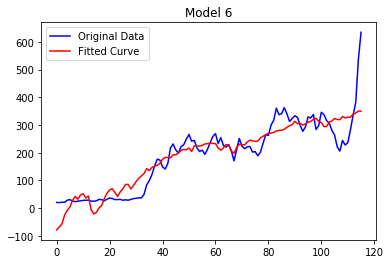

In [29]:
def sixth_model(x, a, b):
    return a + b * x

model_name = "Model 6"
p1, p2 = curve_fit(sixth_model, 1/x, y)
plt.plot(y, c='blue', label="Original Data")
prediction = get_pred(sixth_model, 1/x, *p1)

plt.plot(prediction, c='red', label="Fitted Curve")
plt.legend()
plt.title(model_name)

write_stats(prediction, y, model_name)
elastic = -beta[5]/(alpha[5]+beta[5])

print(f"Коефіцієнт еластичності: {elastic}")

### Порівняльна характеристика

In [30]:
models = pd.DataFrame()
models['Name'] = model
models['r^2'] = r_sq
models['r'] = r
models['f_stat'] = f_stat
models['f'] = f
models['alpha'] = alpha
models['beta'] = beta
models

,Name,r^2,r,f_stat,f,alpha,beta
0,Model 1,0.174027,2.126483,24.018981,0.999967,6.145660e+00,1.001515
1,Model 2,0.174027,2.126483,24.018982,0.999967,6.145660e+00,0.001514
2,Model 3,0.174027,2.126483,24.018983,0.999967,1.815746e+00,0.001514
3,Model 4,0.174027,2.126483,24.018981,0.999967,7.885685e-01,0.000658
4,Model 5,0.501710,1.648706,114.782471,0.996109,7.745908e-09,3.112362
5,Model 6,0.824757,0.824757,536.523674,0.151499,5.574421e+02,-678038.494374


За коефіцієнтом детермінації та ф-стаститикою можна визначити, що зворотна функція краще всіх підходить.

### Model analysis

In [16]:
import statsmodels.api as sm
X = sm.add_constant(1/x.values)
model = sm.OLS(y.tolist(), X)
lin = model.fit()

In [17]:
predicted = lin.predict(X)

In [18]:
lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     536.5
Date:                Wed, 15 Apr 2020   Prob (F-statistic):           6.33e-45
Time:                        22:40:17   Log-Likelihood:                -623.02
No. Observations:                 116   AIC:                             1250.
Df Residuals:                     114   BIC:                             1256.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        557.4421     16.589     33.603      0.000     524.579     590.305
x1          -6.78e+05   2.93e+04    -23.163      0.000   -7.36e+05    -6.2e+05
==============================================================================
Omnibus:                       58.313   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.033
Skew:                           1.599   Prob(JB):                     2.88e-68
Kurtosis:                      10.357   Cond. No.                     6.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<br><br>
Given that the <b>t-statistic</b> p-values for both the coefficients is <b>0</b>, we can say that both const(alpha, or intercept) and beta(x1) are <b>both significant</b>, as their value is lower than our chosen significance level 0.05.<br>
<br>
Judging by the <b>F-statistic</b> of <b>536.5</b> and it's p-value <b>6.33e-45</b>, we can say that our model is indeed not useless and at least one parameter is significant and doesn't equal to 0.
<br>
<br>
We have now achieved and $R^2$ of <b>0.825</b>, which represents the percentage of response variable variation explained by our model, so higher is better.<br>

In [19]:
upper_bound = lin.params[0] + stats.t.ppf(1-0.025, 250) * lin.bse[0]
lower_bound = lin.params[0] - stats.t.ppf(1-0.025, 250) * lin.bse[0]

print('Lower bound ', lower_bound)
print('Our constant value ', lin.params[0])
print('Upper bound ',upper_bound)

Lower bound  524.7699421221483
Our constant value  557.4421305973904
Upper bound  590.1143190726324


In [20]:
upper_bound = lin.params[1] + stats.t.ppf(1-0.025, 250) * lin.bse[1]
lower_bound = lin.params[1] - stats.t.ppf(1-0.025, 250) * lin.bse[1]

print('Lower bound ', lower_bound)
print('Our x1 value ', lin.params[1])
print('Upper bound ',upper_bound)

Lower bound  -735690.6482884925
Our x1 value  -678038.4944430178
Upper bound  -620386.340597543


If we further explore the <b>t-statistic of both parameters</b>, which is <b>33.603 for constant(intercept or alpha)</b>, and <b>-23.163 for x1 (slope, beta)</b>. Both of their p-values are 0, meaning that with a confidence of $\alpha$=0.05 we can reject the null hypothesis that they are insignificant and equal to 0.

### Forecasting with 95% confidence intervals

In [21]:
#forecast_x = 1.2*x.iloc[-1]
forecast_x = np.linspace(x.iloc[-1],1.2*x.iloc[-1],num=10)
forecast_x = np.vstack((np.ones(len(forecast_x)),1/forecast_x)).T

In [22]:
res = lin.get_prediction(forecast_x)

In [23]:
predicted = np.dot(forecast_x, np.array(lin.params))

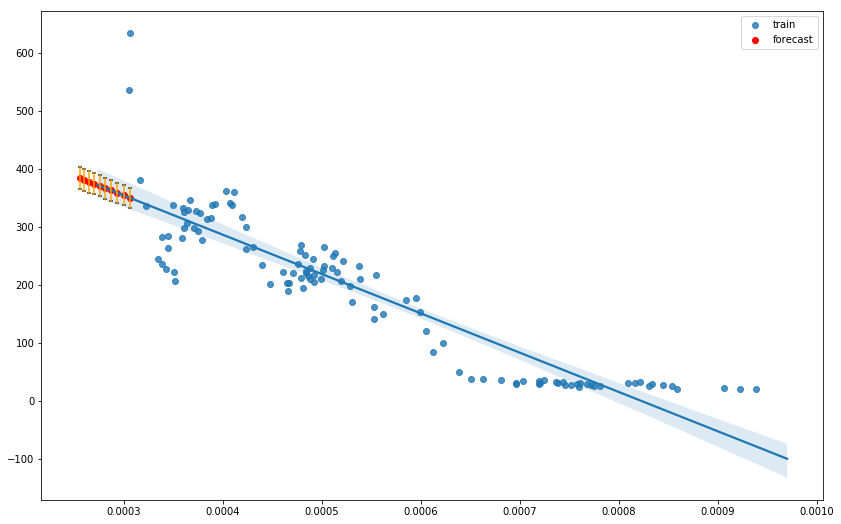

In [27]:
fig,ax = plt.subplots(figsize=(14,9))
confidence = res.conf_int()

sns.regplot(1/x.values, y.values, label='train')
plt.scatter(forecast_x[:,1], predicted, color='red', label='forecast')
for i in range(len(forecast_x)):
    plt.plot([forecast_x[i,1]-0.000001,forecast_x[i,1]+0.000001],[confidence[i,0],confidence[i,0]], color='black')
    plt.plot([forecast_x[i,1]-0.000001,forecast_x[i,1]+0.000001],[confidence[i,1],confidence[i,1]], color='black')
    plt.plot([forecast_x[i,1],forecast_x[i,1]], [confidence[i,0],confidence[i,1]], color='orange')
plt.legend()